## This is the end-to-end learning to focus

In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
# limit_gpu_memory_growth()

from cleanplots import *
import jax.numpy as np
from jax.scipy.special import logsumexp
import numpy as onp
from encoding_information.image_utils import *
from encoding_information.information_estimation import *
import os


2024-01-23 20:05:37.635950: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 20:05:38.868628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-23 20:05:38.868862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-01-23 20:05:38.868879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
initial_measurements = {}
final_measurements = {}
path = '/home/hpinkard_waller/data/'
for file in os.listdir(path):
    if file.endswith('.pt.npy'):
        print(file)
        data = np.load(path + file)
        if '0' in file:
            initial_measurements = data
        else:
            final_measurements = data

newLung_measurementsiteration_0.pt.npy
newLung_measurementsiteration_15.pt.npy


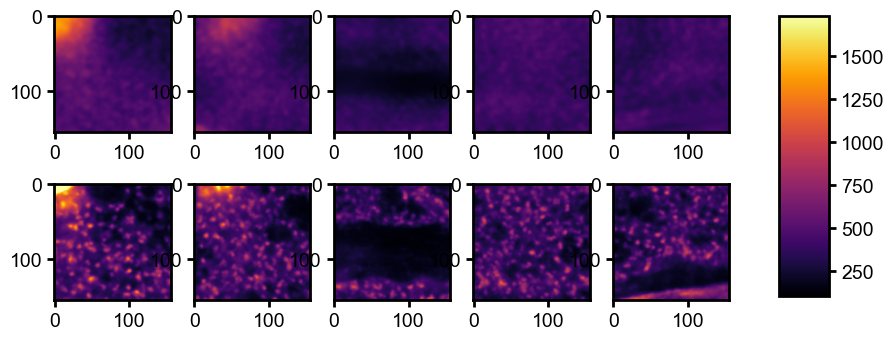

In [3]:

initial_images = initial_measurements
final_images = final_measurements

data_min = min(initial_images.min(), final_images.min())
data_max = max(initial_images.max(), final_images.max())

vmin = np.percentile(np.stack([initial_images, final_images]), 1)
vmax = np.percentile(np.stack([initial_images, final_images]), 99)

# plot 5 of the initial and final measurements
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs[0]):
    ax.imshow(initial_images[i], vmin=vmin, vmax=vmax, cmap='inferno')


for i, ax in enumerate(axs[1]):
    ax.imshow(final_images[i], vmin=vmin, vmax=vmax, cmap='inferno')

# show a shared colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(axs[0, 0].get_images()[0], cax=cbar_ax)


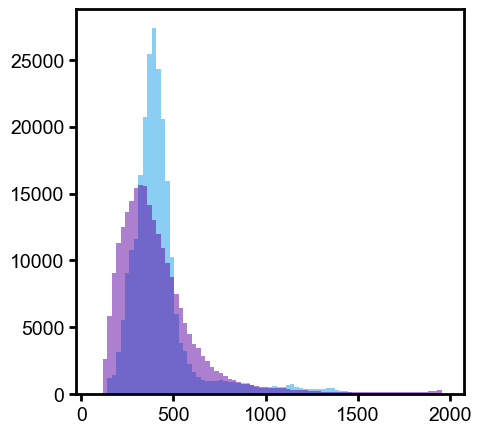

In [4]:

# plot the histograms of the initial and final measurements
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
bins = np.linspace(data_min, data_max, 80)

_ = axs.hist(initial_images[:10].ravel(), bins=bins, alpha=0.5)
_ = axs.hist(final_images[:10].ravel(), bins=bins, alpha=0.5)

# patches from everywhere

In [5]:
patch_size = 25

initial_patches = extract_patches(initial_images, patch_size=patch_size, num_patches=5000, verbose=True)
final_patches = extract_patches(final_images, patch_size=patch_size, num_patches=5000, verbose=True)

initial_noisy_patches = add_noise(initial_patches)
final_noisy_patches = add_noise(final_patches)

initial_mi = estimate_mutual_information(initial_noisy_patches, clean_images=initial_patches, entropy_model='pixel_cnn', verbose=True)
final_mi = estimate_mutual_information(final_noisy_patches, clean_images=final_patches, entropy_model='pixel_cnn', verbose=True)

print('Initial MI: ', initial_mi)
print('Final MI: ', final_mi)

100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [00:31<00:00, 159.73it/s]


Initial validation NLL: 141.23


Epoch 1: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.70it/s]


Epoch 1: validation NLL: 5.69


Epoch 2: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.41it/s]


Epoch 2: validation NLL: 4.80


Epoch 3: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.26it/s]


Epoch 3: validation NLL: 4.67


Epoch 4: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.25it/s]


Epoch 4: validation NLL: 4.76


Epoch 5: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.20it/s]


Epoch 5: validation NLL: 4.67


Epoch 6: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.18it/s]


Epoch 6: validation NLL: 4.63


Epoch 7: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


Epoch 7: validation NLL: 4.56


Epoch 8: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.02it/s]


Epoch 8: validation NLL: 4.62


Epoch 9: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 9: validation NLL: 4.85


Epoch 10: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 10: validation NLL: 4.65


Epoch 11: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.99it/s]


Epoch 11: validation NLL: 4.60


Epoch 12: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.90it/s]


Epoch 12: validation NLL: 4.61


Epoch 13: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.97it/s]


Epoch 13: validation NLL: 4.67


Epoch 14: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.80it/s]


Epoch 14: validation NLL: 4.54


Epoch 15: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.75it/s]


Epoch 15: validation NLL: 4.63


Epoch 16: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.71it/s]


Epoch 16: validation NLL: 4.55


Epoch 17: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.76it/s]


Epoch 17: validation NLL: 4.51


Epoch 18: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.77it/s]


Epoch 18: validation NLL: 4.55


Epoch 19: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 19: validation NLL: 4.52


Epoch 20: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.70it/s]


Epoch 20: validation NLL: 4.69


Epoch 21: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.58it/s]


Epoch 21: validation NLL: 4.53


Epoch 22: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.63it/s]


Epoch 22: validation NLL: 4.65


Epoch 23: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.51it/s]


Epoch 23: validation NLL: 4.53


Epoch 24: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.42it/s]


Epoch 24: validation NLL: 4.53


Epoch 25: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.32it/s]


Epoch 25: validation NLL: 4.52


Epoch 26: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.20it/s]


Epoch 26: validation NLL: 4.63


Epoch 27: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.16it/s]


Epoch 27: validation NLL: 4.58


Epoch 28: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.08it/s]


Epoch 28: validation NLL: 4.51


Epoch 29: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.19it/s]


Epoch 29: validation NLL: 4.55


Epoch 30: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.10it/s]


Epoch 30: validation NLL: 4.52


Epoch 31: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.21it/s]


Epoch 31: validation NLL: 4.55


Epoch 32: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.09it/s]


Epoch 32: validation NLL: 4.55


Epoch 33: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.17it/s]


Epoch 33: validation NLL: 4.58


Epoch 34: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.11it/s]


Epoch 34: validation NLL: 4.52


Epoch 35: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.02it/s]


Epoch 35: validation NLL: 4.54


Epoch 36: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.02it/s]


Epoch 36: validation NLL: 4.59


Epoch 37: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.04it/s]


Epoch 37: validation NLL: 4.71


Epoch 38: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.06it/s]


Epoch 38: validation NLL: 4.51


Epoch 39: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.04it/s]


Epoch 39: validation NLL: 4.52


Epoch 40: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.07it/s]


Epoch 40: validation NLL: 4.52


Epoch 41: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.10it/s]


Epoch 41: validation NLL: 4.54


Epoch 42: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.00it/s]


Epoch 42: validation NLL: 4.51


Epoch 43: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.06it/s]


Epoch 43: validation NLL: 4.65


Epoch 44: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.09it/s]


Epoch 44: validation NLL: 4.61


Epoch 45: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.07it/s]


Epoch 45: validation NLL: 4.54


Epoch 46: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.08it/s]


Epoch 46: validation NLL: 4.53


Epoch 47: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.05it/s]


Epoch 47: validation NLL: 4.73


Epoch 48: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.10it/s]


Epoch 48: validation NLL: 4.51


Epoch 49: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.11it/s]


Epoch 49: validation NLL: 4.59


Epoch 50: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.07it/s]


Epoch 50: validation NLL: 4.55


Epoch 51: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.06it/s]


Epoch 51: validation NLL: 4.51


Epoch 52: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.08it/s]


Epoch 52: validation NLL: 4.55


Epoch 53: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.18it/s]


Epoch 53: validation NLL: 4.53


Epoch 54: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.16it/s]


Epoch 54: validation NLL: 4.56


Epoch 55: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.26it/s]


Epoch 55: validation NLL: 4.53


Epoch 56: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.16it/s]


Epoch 56: validation NLL: 4.56


Epoch 57: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.26it/s]


Epoch 57: validation NLL: 4.78


Epoch 58: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.23it/s]


Epoch 58: validation NLL: 4.59


Epoch 59: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.34it/s]


Epoch 59: validation NLL: 4.58


Epoch 60: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.28it/s]


Epoch 60: validation NLL: 4.73


Epoch 61: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.31it/s]


Epoch 61: validation NLL: 4.56


Epoch 62: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.27it/s]


Epoch 62: validation NLL: 4.53


Epoch 63: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.30it/s]


Epoch 63: validation NLL: 4.51


Epoch 64: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.28it/s]


Epoch 64: validation NLL: 4.51


Epoch 65: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.30it/s]


Epoch 65: validation NLL: 4.54


Epoch 66: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.31it/s]


Epoch 66: validation NLL: 4.52


Epoch 67: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.34it/s]


Epoch 67: validation NLL: 4.51


Epoch 68: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.38it/s]


Epoch 68: validation NLL: 4.50


Epoch 69: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.40it/s]


Epoch 69: validation NLL: 4.52


Epoch 70: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 70: validation NLL: 4.51


Epoch 71: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.47it/s]


Epoch 71: validation NLL: 4.56


Epoch 72: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.47it/s]


Epoch 72: validation NLL: 4.50


Epoch 73: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 73: validation NLL: 4.56


Epoch 74: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.42it/s]


Epoch 74: validation NLL: 4.51


Epoch 75: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.44it/s]


Epoch 75: validation NLL: 4.54


Epoch 76: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.39it/s]


Epoch 76: validation NLL: 4.62


Epoch 77: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 77: validation NLL: 4.52


Epoch 78: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.47it/s]


Epoch 78: validation NLL: 4.50


Epoch 79: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 79: validation NLL: 4.53


Epoch 80: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.44it/s]


Epoch 80: validation NLL: 4.52


Epoch 81: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 81: validation NLL: 4.52


Epoch 82: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 82: validation NLL: 4.50


Epoch 83: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.50it/s]


Epoch 83: validation NLL: 4.53


Epoch 84: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.43it/s]


Epoch 84: validation NLL: 4.50


Epoch 85: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.52it/s]


Epoch 85: validation NLL: 4.53


Epoch 86: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.55it/s]


Epoch 86: validation NLL: 4.60


Epoch 87: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.60it/s]


Epoch 87: validation NLL: 4.49


Epoch 88: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.57it/s]


Epoch 88: validation NLL: 4.56


Epoch 89: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.57it/s]


Epoch 89: validation NLL: 4.51


Epoch 90: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.62it/s]


Epoch 90: validation NLL: 4.60


Epoch 91: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.57it/s]


Epoch 91: validation NLL: 4.50


Epoch 92: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.60it/s]


Epoch 92: validation NLL: 4.56


Epoch 93: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.59it/s]


Epoch 93: validation NLL: 4.49


Epoch 94: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.63it/s]


Epoch 94: validation NLL: 4.54


Epoch 95: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.65it/s]


Epoch 95: validation NLL: 4.51


Epoch 96: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.64it/s]


Epoch 96: validation NLL: 4.54


Epoch 97: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.65it/s]


Epoch 97: validation NLL: 4.51


Epoch 98: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.65it/s]


Epoch 98: validation NLL: 4.52


Epoch 99: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 99: validation NLL: 4.49


Epoch 100: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.64it/s]


Epoch 100: validation NLL: 4.51


Epoch 101: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 101: validation NLL: 4.50


Epoch 102: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.63it/s]


Epoch 102: validation NLL: 4.55


Epoch 103: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.64it/s]


Epoch 103: validation NLL: 6.92


Epoch 104: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.70it/s]


Epoch 104: validation NLL: 6.63


Epoch 105: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.83it/s]


Epoch 105: validation NLL: 7.34


Epoch 106: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.10it/s]


Epoch 106: validation NLL: 7.34


Epoch 107: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


Epoch 107: validation NLL: 7.34


Epoch 108: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.10it/s]


Epoch 108: validation NLL: 7.21


Epoch 109: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 109: validation NLL: 6.62


Epoch 110: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.99it/s]


Epoch 110: validation NLL: 6.61


Epoch 111: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.93it/s]


Epoch 111: validation NLL: 6.61


Epoch 112: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 112: validation NLL: 6.61


Epoch 113: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.98it/s]


Epoch 113: validation NLL: 6.61


Epoch 114: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


Epoch 114: validation NLL: 6.61


Epoch 115: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.94it/s]


Epoch 115: validation NLL: 6.61


Epoch 116: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 116: validation NLL: 6.61


Epoch 117: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.99it/s]


Epoch 117: validation NLL: 6.61


Epoch 118: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 118: validation NLL: 6.61


Epoch 119: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 119: validation NLL: 6.61


Epoch 120: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 120: validation NLL: 6.61


Epoch 121: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 121: validation NLL: 6.61


Epoch 122: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 122: validation NLL: 6.61


Epoch 123: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


Epoch 123: validation NLL: 6.61


Epoch 124: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 124: validation NLL: 6.61


Epoch 125: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 125: validation NLL: 6.61


Epoch 126: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


Epoch 126: validation NLL: 6.61


Epoch 127: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.02it/s]


Epoch 127: validation NLL: 6.61
Estimated H(Y|X) = 4.378 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.491 differential entropy/pixel
Estimated I(Y;X) = 0.162 bits/pixel
Initial validation NLL: 184.29


Epoch 1: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.21it/s]


Epoch 1: validation NLL: 5.85


Epoch 2: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.80it/s]


Epoch 2: validation NLL: 5.55


Epoch 3: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.93it/s]


Epoch 3: validation NLL: 6.00


Epoch 4: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.94it/s]


Epoch 4: validation NLL: 5.26


Epoch 5: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.85it/s]


Epoch 5: validation NLL: 4.87


Epoch 6: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.93it/s]


Epoch 6: validation NLL: 5.08


Epoch 7: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.95it/s]


Epoch 7: validation NLL: 4.77


Epoch 8: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.96it/s]


Epoch 8: validation NLL: 4.75


Epoch 9: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.81it/s]


Epoch 9: validation NLL: 4.69


Epoch 10: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.81it/s]


Epoch 10: validation NLL: 4.76


Epoch 11: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.82it/s]


Epoch 11: validation NLL: 4.74


Epoch 12: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.85it/s]


Epoch 12: validation NLL: 4.88


Epoch 13: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.80it/s]


Epoch 13: validation NLL: 4.79


Epoch 14: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.77it/s]


Epoch 14: validation NLL: 4.70


Epoch 15: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.77it/s]


Epoch 15: validation NLL: 4.66


Epoch 16: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.78it/s]


Epoch 16: validation NLL: 4.65


Epoch 17: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.73it/s]


Epoch 17: validation NLL: 4.63


Epoch 18: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.76it/s]


Epoch 18: validation NLL: 4.70


Epoch 19: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.78it/s]


Epoch 19: validation NLL: 4.68


Epoch 20: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.76it/s]


Epoch 20: validation NLL: 4.65


Epoch 21: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.73it/s]


Epoch 21: validation NLL: 4.64


Epoch 22: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.77it/s]


Epoch 22: validation NLL: 4.67


Epoch 23: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.75it/s]


Epoch 23: validation NLL: 4.69


Epoch 24: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 24: validation NLL: 4.67


Epoch 25: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 25: validation NLL: 4.62


Epoch 26: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.70it/s]


Epoch 26: validation NLL: 4.64


Epoch 27: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.64it/s]


Epoch 27: validation NLL: 4.66


Epoch 28: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 28: validation NLL: 4.62


Epoch 29: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 29: validation NLL: 4.63


Epoch 30: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.65it/s]


Epoch 30: validation NLL: 4.74


Epoch 31: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 31: validation NLL: 4.67


Epoch 32: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.62it/s]


Epoch 32: validation NLL: 4.77


Epoch 33: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.71it/s]


Epoch 33: validation NLL: 4.64


Epoch 34: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 34: validation NLL: 4.72


Epoch 35: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.64it/s]


Epoch 35: validation NLL: 4.70


Epoch 36: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 36: validation NLL: 4.71


Epoch 37: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.60it/s]


Epoch 37: validation NLL: 4.64


Epoch 38: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.64it/s]


Epoch 38: validation NLL: 4.61


Epoch 39: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.57it/s]


Epoch 39: validation NLL: 4.64


Epoch 40: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.55it/s]


Epoch 40: validation NLL: 4.61


Epoch 41: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.49it/s]


Epoch 41: validation NLL: 4.71


Epoch 42: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.55it/s]


Epoch 42: validation NLL: 4.66


Epoch 43: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.54it/s]


Epoch 43: validation NLL: 4.61


Epoch 44: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.51it/s]


Epoch 44: validation NLL: 4.67


Epoch 45: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.44it/s]


Epoch 45: validation NLL: 4.62


Epoch 46: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.44it/s]


Epoch 46: validation NLL: 4.62


Epoch 47: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.46it/s]


Epoch 47: validation NLL: 4.61


Epoch 48: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.51it/s]


Epoch 48: validation NLL: 4.62


Epoch 49: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.45it/s]


Epoch 49: validation NLL: 4.65


Epoch 50: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.40it/s]


Epoch 50: validation NLL: 4.62


Epoch 51: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.47it/s]


Epoch 51: validation NLL: 4.96


Epoch 52: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.41it/s]


Epoch 52: validation NLL: 4.63


Epoch 53: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.39it/s]


Epoch 53: validation NLL: 4.63


Epoch 54: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.47it/s]


Epoch 54: validation NLL: 4.66


Epoch 55: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.35it/s]


Epoch 55: validation NLL: 4.61


Epoch 56: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.42it/s]


Epoch 56: validation NLL: 4.63


Epoch 57: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.43it/s]


Epoch 57: validation NLL: 4.61


Epoch 58: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.38it/s]


Epoch 58: validation NLL: 4.65


Epoch 59: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.46it/s]


Epoch 59: validation NLL: 4.62


Epoch 60: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.24it/s]


Epoch 60: validation NLL: 4.61


Epoch 61: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.50it/s]


Epoch 61: validation NLL: 4.64


Epoch 62: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.44it/s]


Epoch 62: validation NLL: 4.61


Epoch 63: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.38it/s]


Epoch 63: validation NLL: 4.61


Epoch 64: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.43it/s]


Epoch 64: validation NLL: 4.61


Epoch 65: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.46it/s]


Epoch 65: validation NLL: 4.62


Epoch 66: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.51it/s]


Epoch 66: validation NLL: 4.70


Epoch 67: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 67: validation NLL: 4.61


Epoch 68: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.48it/s]


Epoch 68: validation NLL: 4.83


Epoch 69: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.45it/s]


Epoch 69: validation NLL: 4.61


Epoch 70: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.56it/s]


Epoch 70: validation NLL: 4.63


Epoch 71: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.54it/s]


Epoch 71: validation NLL: 4.60


Epoch 72: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.50it/s]


Epoch 72: validation NLL: 4.70


Epoch 73: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.47it/s]


Epoch 73: validation NLL: 4.61


Epoch 74: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.51it/s]


Epoch 74: validation NLL: 4.64


Epoch 75: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.52it/s]


Epoch 75: validation NLL: 4.62


Epoch 76: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.56it/s]


Epoch 76: validation NLL: 4.63


Epoch 77: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.52it/s]


Epoch 77: validation NLL: 4.60


Epoch 78: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.51it/s]


Epoch 78: validation NLL: 4.65


Epoch 79: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.53it/s]


Epoch 79: validation NLL: 4.61


Epoch 80: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.53it/s]


Epoch 80: validation NLL: 4.61


Epoch 81: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.55it/s]


Epoch 81: validation NLL: 4.67


Epoch 82: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.56it/s]


Epoch 82: validation NLL: 4.70


Epoch 83: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.51it/s]


Epoch 83: validation NLL: 4.62


Epoch 84: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.59it/s]


Epoch 84: validation NLL: 4.60


Epoch 85: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.60it/s]


Epoch 85: validation NLL: 4.63


Epoch 86: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.61it/s]


Epoch 86: validation NLL: 4.60


Epoch 87: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 87: validation NLL: 4.61


Epoch 88: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.62it/s]


Epoch 88: validation NLL: 4.62


Epoch 89: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.62it/s]


Epoch 89: validation NLL: 4.61


Epoch 90: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.61it/s]


Epoch 90: validation NLL: 4.61


Epoch 91: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.67it/s]


Epoch 91: validation NLL: 4.62


Epoch 92: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 92: validation NLL: 4.65


Epoch 93: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.56it/s]


Epoch 93: validation NLL: 4.60


Epoch 94: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.62it/s]


Epoch 94: validation NLL: 4.64


Epoch 95: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.69it/s]


Epoch 95: validation NLL: 4.60


Epoch 96: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 96: validation NLL: 4.60


Epoch 97: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.57it/s]


Epoch 97: validation NLL: 4.61


Epoch 98: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.66it/s]


Epoch 98: validation NLL: 4.60


Epoch 99: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 99: validation NLL: 4.60


Epoch 100: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


Epoch 100: validation NLL: 4.62


Epoch 101: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.73it/s]


Epoch 101: validation NLL: 4.86


Epoch 102: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.82it/s]


Epoch 102: validation NLL: 4.60


Epoch 103: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.81it/s]


Epoch 103: validation NLL: 4.62


Epoch 104: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.86it/s]


Epoch 104: validation NLL: 4.61


Epoch 105: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.80it/s]


Epoch 105: validation NLL: 4.62


Epoch 106: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.83it/s]


Epoch 106: validation NLL: 4.61


Epoch 107: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.86it/s]


Epoch 107: validation NLL: 4.60


Epoch 108: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.79it/s]


Epoch 108: validation NLL: 4.62


Epoch 109: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.87it/s]


Epoch 109: validation NLL: 4.62


Epoch 110: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.81it/s]


Epoch 110: validation NLL: 4.60


Epoch 111: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.92it/s]


Epoch 111: validation NLL: 4.60


Epoch 112: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.92it/s]


Epoch 112: validation NLL: 4.62


Epoch 113: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.92it/s]


Epoch 113: validation NLL: 4.62


Epoch 114: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.92it/s]


Epoch 114: validation NLL: 4.61


Epoch 115: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.89it/s]


Epoch 115: validation NLL: 4.61


Epoch 116: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.91it/s]


Epoch 116: validation NLL: 4.60


Epoch 117: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.89it/s]


Epoch 117: validation NLL: 4.60


Epoch 118: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.98it/s]


Epoch 118: validation NLL: 4.63


Epoch 119: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.97it/s]


Epoch 119: validation NLL: 4.62


Epoch 120: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.94it/s]


Epoch 120: validation NLL: 4.61


Epoch 121: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.96it/s]


Epoch 121: validation NLL: 4.61


Epoch 122: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.95it/s]


Epoch 122: validation NLL: 4.60


Epoch 123: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 123: validation NLL: 4.60


Epoch 124: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.98it/s]


Epoch 124: validation NLL: 4.61


Epoch 125: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 125: validation NLL: 4.60


Epoch 126: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.98it/s]


Epoch 126: validation NLL: 4.60


Epoch 127: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.97it/s]


Epoch 127: validation NLL: 4.61


Epoch 128: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 128: validation NLL: 4.62


Epoch 129: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.06it/s]


Epoch 129: validation NLL: 4.61


Epoch 130: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.04it/s]


Epoch 130: validation NLL: 4.61


Epoch 131: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.99it/s]


Epoch 131: validation NLL: 4.61


Epoch 132: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


Epoch 132: validation NLL: 4.60


Epoch 133: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.08it/s]


Epoch 133: validation NLL: 4.62


Epoch 134: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


Epoch 134: validation NLL: 4.60


Epoch 135: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


Epoch 135: validation NLL: 4.60


Epoch 136: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.04it/s]


Epoch 136: validation NLL: 4.65


Epoch 137: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


Epoch 137: validation NLL: 4.60


Epoch 138: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 138: validation NLL: 4.60


Epoch 139: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 139: validation NLL: 4.61


Epoch 140: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


Epoch 140: validation NLL: 4.61


Epoch 141: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


Epoch 141: validation NLL: 4.60


Epoch 142: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 142: validation NLL: 4.64


Epoch 143: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


Epoch 143: validation NLL: 4.63


Epoch 144: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.01it/s]


Epoch 144: validation NLL: 4.61


Epoch 145: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


Epoch 145: validation NLL: 4.61


Epoch 146: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


Epoch 146: validation NLL: 4.60


Epoch 147: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 147: validation NLL: 4.63


Epoch 148: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


Epoch 148: validation NLL: 4.62


Epoch 149: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


Epoch 149: validation NLL: 4.67


Epoch 150: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


Epoch 150: validation NLL: 4.60


Epoch 151: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.11it/s]


Epoch 151: validation NLL: 4.60


Epoch 152: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.06it/s]


Epoch 152: validation NLL: 4.60


Epoch 153: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.08it/s]


Epoch 153: validation NLL: 4.61


Epoch 154: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.02it/s]


Epoch 154: validation NLL: 4.62


Epoch 155: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.06it/s]


Epoch 155: validation NLL: 4.60


Epoch 156: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.08it/s]


Epoch 156: validation NLL: 4.65


Epoch 157: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.02it/s]


Epoch 157: validation NLL: 4.61


Epoch 158: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.06it/s]


Epoch 158: validation NLL: 4.61


Epoch 159: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.02it/s]


Epoch 159: validation NLL: 4.60


Epoch 160: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 160: validation NLL: 4.61


Epoch 161: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


Epoch 161: validation NLL: 4.62


Epoch 162: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.99it/s]


Epoch 162: validation NLL: 4.61


Epoch 163: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.06it/s]


Epoch 163: validation NLL: 4.62


Epoch 164: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


Epoch 164: validation NLL: 4.62


Epoch 165: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.08it/s]


Epoch 165: validation NLL: 4.62


Epoch 166: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


Epoch 166: validation NLL: 4.61
Estimated H(Y|X) = 4.330 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.617 differential entropy/pixel
Estimated I(Y;X) = 0.413 bits/pixel
Initial MI:  0.1618914
Final MI:  0.4127391


```
Initial MI:  0.15475275
Final MI:  0.4062354
```

# Try bigger patches (80)

In [6]:
patch_size = 80

initial_patches = extract_patches(initial_images, patch_size=patch_size, num_patches=5000, verbose=True)
final_patches = extract_patches(final_images, patch_size=patch_size, num_patches=5000, verbose=True)

initial_noisy_patches = add_noise(initial_patches)
final_noisy_patches = add_noise(final_patches)

initial_mi = estimate_mutual_information(initial_noisy_patches, clean_images=initial_patches, entropy_model='pixel_cnn', verbose=True)
final_mi = estimate_mutual_information(final_noisy_patches, clean_images=final_patches, entropy_model='pixel_cnn', verbose=True)

print('Initial MI: ', initial_mi)
print('Final MI: ', final_mi)

100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [00:31<00:00, 158.27it/s]


Initial validation NLL: 148.71


Epoch 1: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.44it/s]


Epoch 1: validation NLL: 5.22


Epoch 2: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.44it/s]


Epoch 2: validation NLL: 4.72


Epoch 3: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.43it/s]


Epoch 3: validation NLL: 4.63


Epoch 4: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.44it/s]


Epoch 4: validation NLL: 4.62


Epoch 5: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 5: validation NLL: 4.52


Epoch 6: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 6: validation NLL: 4.57


Epoch 7: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 7: validation NLL: 4.52


Epoch 8: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 8: validation NLL: 4.55


Epoch 9: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 9: validation NLL: 4.48


Epoch 10: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 10: validation NLL: 4.50


Epoch 11: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 11: validation NLL: 4.48


Epoch 12: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 12: validation NLL: 4.51


Epoch 13: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 13: validation NLL: 4.49


Epoch 14: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 14: validation NLL: 4.47


Epoch 15: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 15: validation NLL: 4.51


Epoch 16: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 16: validation NLL: 4.59


Epoch 17: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 17: validation NLL: 4.49


Epoch 18: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 18: validation NLL: 4.48


Epoch 19: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 19: validation NLL: 4.48


Epoch 20: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 20: validation NLL: 4.48


Epoch 21: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 21: validation NLL: 4.49


Epoch 22: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 22: validation NLL: 4.47


Epoch 23: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 23: validation NLL: 4.47


Epoch 24: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 24: validation NLL: 4.51


Epoch 25: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 25: validation NLL: 4.47


Epoch 26: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 26: validation NLL: 4.48


Epoch 27: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 27: validation NLL: 4.47


Epoch 28: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 28: validation NLL: 4.48


Epoch 29: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 29: validation NLL: 4.46


Epoch 30: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 30: validation NLL: 4.47


Epoch 31: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 31: validation NLL: 4.50


Epoch 32: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 32: validation NLL: 4.50


Epoch 33: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 33: validation NLL: 4.53


Epoch 34: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 34: validation NLL: 4.51


Epoch 35: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 35: validation NLL: 4.53


Epoch 36: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 36: validation NLL: 4.54


Epoch 37: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 37: validation NLL: 4.50


Epoch 38: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 38: validation NLL: 4.49


Epoch 39: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 39: validation NLL: 4.48


Epoch 40: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 40: validation NLL: 4.46


Epoch 41: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 41: validation NLL: 4.51


Epoch 42: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 42: validation NLL: 4.46


Epoch 43: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 43: validation NLL: 4.46


Epoch 44: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 44: validation NLL: 4.46


Epoch 45: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 45: validation NLL: 4.49


Epoch 46: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 46: validation NLL: 4.48


Epoch 47: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 47: validation NLL: 4.57


Epoch 48: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 48: validation NLL: 4.59


Epoch 49: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 49: validation NLL: 4.56


Epoch 50: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 50: validation NLL: 4.48


Epoch 51: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 51: validation NLL: 4.47


Epoch 52: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 52: validation NLL: 4.47


Epoch 53: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 53: validation NLL: 4.48


Epoch 54: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 54: validation NLL: 4.49


Epoch 55: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 55: validation NLL: 4.49


Epoch 56: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 56: validation NLL: 4.49


Epoch 57: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 57: validation NLL: 4.47


Epoch 58: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 58: validation NLL: 4.54


Epoch 59: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 59: validation NLL: 4.55


Epoch 60: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 60: validation NLL: 4.50


Epoch 61: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 61: validation NLL: 4.51


Epoch 62: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 62: validation NLL: 4.47


Epoch 63: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 63: validation NLL: 4.46


Epoch 64: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 64: validation NLL: 4.48


Epoch 65: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 65: validation NLL: 4.49


Epoch 66: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 66: validation NLL: 4.46


Epoch 67: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 67: validation NLL: 4.49


Epoch 68: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 68: validation NLL: 4.46


Epoch 69: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 69: validation NLL: 4.46


Epoch 70: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 70: validation NLL: 4.48


Epoch 71: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 71: validation NLL: 4.46


Epoch 72: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 72: validation NLL: 4.46


Epoch 73: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 73: validation NLL: 4.49


Epoch 74: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 74: validation NLL: 4.46


Epoch 75: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 75: validation NLL: 4.46


Epoch 76: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 76: validation NLL: 4.49


Epoch 77: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 77: validation NLL: 4.50


Epoch 78: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 78: validation NLL: 4.48


Epoch 79: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 79: validation NLL: 4.45


Epoch 80: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 80: validation NLL: 4.46


Epoch 81: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 81: validation NLL: 4.48


Epoch 82: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 82: validation NLL: 4.47


Epoch 83: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 83: validation NLL: 4.47


Epoch 84: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 84: validation NLL: 4.46


Epoch 85: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 85: validation NLL: 4.45


Epoch 86: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 86: validation NLL: 4.47


Epoch 87: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 87: validation NLL: 4.46


Epoch 88: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 88: validation NLL: 4.47


Epoch 89: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 89: validation NLL: 4.46


Epoch 90: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 90: validation NLL: 4.47


Epoch 91: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 91: validation NLL: 4.46


Epoch 92: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 92: validation NLL: 4.47


Epoch 93: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 93: validation NLL: 4.49


Epoch 94: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 94: validation NLL: 4.46


Epoch 95: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 95: validation NLL: 4.49


Epoch 96: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 96: validation NLL: 4.45


Epoch 97: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 97: validation NLL: 4.46


Epoch 98: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 98: validation NLL: 4.45


Epoch 99: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 99: validation NLL: 4.45


Epoch 100: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 100: validation NLL: 4.46


Epoch 101: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 101: validation NLL: 4.46


Epoch 102: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 102: validation NLL: 4.47


Epoch 103: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 103: validation NLL: 4.47


Epoch 104: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 104: validation NLL: 4.47


Epoch 105: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 105: validation NLL: 4.46


Epoch 106: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 106: validation NLL: 4.45


Epoch 107: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 107: validation NLL: 4.54


Epoch 108: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 108: validation NLL: 4.50


Epoch 109: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 109: validation NLL: 4.45


Epoch 110: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 110: validation NLL: 4.45


Epoch 111: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 111: validation NLL: 4.46


Epoch 112: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 112: validation NLL: 4.45


Epoch 113: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 113: validation NLL: 4.47


Epoch 114: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 114: validation NLL: 4.54


Epoch 115: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 115: validation NLL: 4.45


Epoch 116: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 116: validation NLL: 4.46


Epoch 117: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 117: validation NLL: 4.46


Epoch 118: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 118: validation NLL: 4.45


Epoch 119: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 119: validation NLL: 4.47


Epoch 120: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 120: validation NLL: 4.45


Epoch 121: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 121: validation NLL: 4.47


Epoch 122: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 122: validation NLL: 4.45


Epoch 123: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 123: validation NLL: 4.46


Epoch 124: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 124: validation NLL: 4.45


Epoch 125: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 125: validation NLL: 4.45


Epoch 126: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 126: validation NLL: 4.45


Epoch 127: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 127: validation NLL: 4.46


Epoch 128: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 128: validation NLL: 4.46


Epoch 129: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 129: validation NLL: 4.46


Epoch 130: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 130: validation NLL: 4.47


Epoch 131: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 131: validation NLL: 4.45


Epoch 132: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 132: validation NLL: 4.45


Epoch 133: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 133: validation NLL: 4.46


Epoch 134: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 134: validation NLL: 4.45


Epoch 135: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 135: validation NLL: 4.45


Epoch 136: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 136: validation NLL: 4.45


Epoch 137: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 137: validation NLL: 4.48


Epoch 138: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 138: validation NLL: 4.48


Epoch 139: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 139: validation NLL: 4.47


Epoch 140: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 140: validation NLL: 4.45


Epoch 141: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 141: validation NLL: 6.13


Epoch 142: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 142: validation NLL: 6.48


Epoch 143: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 143: validation NLL: 6.48


Epoch 144: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 144: validation NLL: 6.48


Epoch 145: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 145: validation NLL: 6.48


Epoch 146: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 146: validation NLL: 6.48


Epoch 147: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 147: validation NLL: 6.48


Epoch 148: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 148: validation NLL: 6.48


Epoch 149: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 149: validation NLL: 6.48


Epoch 150: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 150: validation NLL: 6.48


Epoch 151: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 151: validation NLL: 6.48


Epoch 152: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 152: validation NLL: 6.48


Epoch 153: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 153: validation NLL: 6.48


Epoch 154: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 154: validation NLL: 6.48


Epoch 155: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 155: validation NLL: 6.48


Epoch 156: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 156: validation NLL: 6.48


Epoch 157: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 157: validation NLL: 6.48


Epoch 158: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 158: validation NLL: 6.48


Epoch 159: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 159: validation NLL: 6.48


Epoch 160: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 160: validation NLL: 6.48


Epoch 161: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 161: validation NLL: 6.48


Epoch 162: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 162: validation NLL: 6.48


Epoch 163: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.57it/s]


Epoch 163: validation NLL: 6.48


Epoch 164: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 164: validation NLL: 6.48


Epoch 165: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 165: validation NLL: 6.48


Epoch 166: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 166: validation NLL: 6.48


Epoch 167: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 167: validation NLL: 6.48


Epoch 168: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 168: validation NLL: 6.48


Epoch 169: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 169: validation NLL: 6.48


Epoch 170: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 170: validation NLL: 6.48


Epoch 171: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 171: validation NLL: 6.48


Epoch 172: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 172: validation NLL: 6.48


Epoch 173: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 173: validation NLL: 6.48


Epoch 174: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 174: validation NLL: 6.48


Epoch 175: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 175: validation NLL: 6.48


Epoch 176: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 176: validation NLL: 6.48
Estimated H(Y|X) = 4.381 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.455 differential entropy/pixel
Estimated I(Y;X) = 0.106 bits/pixel
Initial validation NLL: 189.10


Epoch 1: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.09it/s]


Epoch 1: validation NLL: 5.96


Epoch 2: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 2: validation NLL: 4.97


Epoch 3: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 3: validation NLL: 4.80


Epoch 4: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 4: validation NLL: 6.17


Epoch 5: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 5: validation NLL: 4.82


Epoch 6: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 6: validation NLL: 5.19


Epoch 7: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 7: validation NLL: 4.70


Epoch 8: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 8: validation NLL: 4.81


Epoch 9: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 9: validation NLL: 4.78


Epoch 10: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 10: validation NLL: 4.65


Epoch 11: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 11: validation NLL: 4.68


Epoch 12: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 12: validation NLL: 4.77


Epoch 13: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 13: validation NLL: 4.74


Epoch 14: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 14: validation NLL: 4.63


Epoch 15: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 15: validation NLL: 4.89


Epoch 16: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 16: validation NLL: 4.64


Epoch 17: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 17: validation NLL: 4.60


Epoch 18: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 18: validation NLL: 4.59


Epoch 19: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 19: validation NLL: 4.90


Epoch 20: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 20: validation NLL: 4.60


Epoch 21: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 21: validation NLL: 4.61


Epoch 22: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 22: validation NLL: 4.60


Epoch 23: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 23: validation NLL: 4.99


Epoch 24: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 24: validation NLL: 4.63


Epoch 25: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 25: validation NLL: 4.60


Epoch 26: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 26: validation NLL: 4.60


Epoch 27: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 27: validation NLL: 4.63


Epoch 28: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 28: validation NLL: 4.64


Epoch 29: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 29: validation NLL: 4.59


Epoch 30: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 30: validation NLL: 4.60


Epoch 31: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 31: validation NLL: 4.61


Epoch 32: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 32: validation NLL: 4.62


Epoch 33: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 33: validation NLL: 4.65


Epoch 34: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 34: validation NLL: 4.60


Epoch 35: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 35: validation NLL: 4.60


Epoch 36: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 36: validation NLL: 4.63


Epoch 37: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 37: validation NLL: 4.60


Epoch 38: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 38: validation NLL: 4.65


Epoch 39: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 39: validation NLL: 4.60


Epoch 40: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 40: validation NLL: 4.87


Epoch 41: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 41: validation NLL: 4.59


Epoch 42: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 42: validation NLL: 4.60


Epoch 43: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 43: validation NLL: 4.59


Epoch 44: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 44: validation NLL: 4.69


Epoch 45: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 45: validation NLL: 4.61


Epoch 46: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 46: validation NLL: 4.58


Epoch 47: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 47: validation NLL: 4.58


Epoch 48: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 48: validation NLL: 4.59


Epoch 49: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 49: validation NLL: 4.58


Epoch 50: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 50: validation NLL: 4.59


Epoch 51: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 51: validation NLL: 4.62


Epoch 52: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 52: validation NLL: 4.67


Epoch 53: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 53: validation NLL: 4.61


Epoch 54: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 54: validation NLL: 4.58


Epoch 55: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 55: validation NLL: 4.58


Epoch 56: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 56: validation NLL: 4.62


Epoch 57: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 57: validation NLL: 4.58


Epoch 58: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 58: validation NLL: 4.59


Epoch 59: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 59: validation NLL: 4.63


Epoch 60: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 60: validation NLL: 4.58


Epoch 61: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 61: validation NLL: 4.58


Epoch 62: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 62: validation NLL: 4.63


Epoch 63: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 63: validation NLL: 4.60


Epoch 64: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 64: validation NLL: 4.58


Epoch 65: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 65: validation NLL: 4.57


Epoch 66: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 66: validation NLL: 4.58


Epoch 67: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 67: validation NLL: 4.61


Epoch 68: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 68: validation NLL: 4.58


Epoch 69: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 69: validation NLL: 5.05


Epoch 70: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 70: validation NLL: 6.85


Epoch 71: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 71: validation NLL: 6.82


Epoch 72: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 72: validation NLL: 6.82


Epoch 73: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 73: validation NLL: 6.81


Epoch 74: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 74: validation NLL: 6.81


Epoch 75: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 75: validation NLL: 6.81


Epoch 76: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 76: validation NLL: 6.81


Epoch 77: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 77: validation NLL: 6.81


Epoch 78: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 78: validation NLL: 6.81


Epoch 79: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 79: validation NLL: 6.81


Epoch 80: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 80: validation NLL: 6.81


Epoch 81: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 81: validation NLL: 6.81


Epoch 82: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 82: validation NLL: 6.81


Epoch 83: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 83: validation NLL: 6.81


Epoch 84: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 84: validation NLL: 6.81


Epoch 85: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 85: validation NLL: 6.81


Epoch 86: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 86: validation NLL: 6.81


Epoch 87: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 87: validation NLL: 6.81


Epoch 88: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 88: validation NLL: 6.81


Epoch 89: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 89: validation NLL: 6.81


Epoch 90: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 90: validation NLL: 6.81


Epoch 91: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 91: validation NLL: 6.81


Epoch 92: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 92: validation NLL: 6.81


Epoch 93: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 93: validation NLL: 6.81


Epoch 94: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 94: validation NLL: 6.81


Epoch 95: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 95: validation NLL: 6.81


Epoch 96: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 96: validation NLL: 6.81


Epoch 97: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 97: validation NLL: 6.81


Epoch 98: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 98: validation NLL: 6.81


Epoch 99: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 99: validation NLL: 6.81


Epoch 100: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 100: validation NLL: 6.81


Epoch 101: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 101: validation NLL: 6.81


Epoch 102: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 102: validation NLL: 6.81


Epoch 103: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 103: validation NLL: 6.81


Epoch 104: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 104: validation NLL: 6.81


Epoch 105: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 105: validation NLL: 6.81
Estimated H(Y|X) = 4.334 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.577 differential entropy/pixel
Estimated I(Y;X) = 0.351 bits/pixel
Initial MI:  0.10600116
Final MI:  0.35108814


```
Initial MI:  0.10600116
Final MI:  0.35108814
```

### replicate

In [4]:
patch_size = 80

initial_patches = extract_patches(initial_images, patch_size=patch_size, num_patches=5000, verbose=True)
final_patches = extract_patches(final_images, patch_size=patch_size, num_patches=5000, verbose=True)

initial_noisy_patches = add_noise(initial_patches)
final_noisy_patches = add_noise(final_patches)

initial_mi = estimate_mutual_information(initial_noisy_patches, clean_images=initial_patches, entropy_model='pixel_cnn', verbose=True)
final_mi = estimate_mutual_information(final_noisy_patches, clean_images=final_patches, entropy_model='pixel_cnn', verbose=True)

print('Initial MI: ', initial_mi)
print('Final MI: ', final_mi)

100%|██████████| 5000/5000 [00:55<00:00, 89.98it/s] 


Initial validation NLL: 156.50


Epoch 1: 100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


Epoch 1: validation NLL: 5.56


Epoch 2: 100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


Epoch 2: validation NLL: 4.71


Epoch 3: 100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


Epoch 3: validation NLL: 4.67


Epoch 4: 100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


Epoch 4: validation NLL: 4.55


Epoch 5: 100%|██████████| 100/100 [00:15<00:00,  6.33it/s]


Epoch 5: validation NLL: 4.53


Epoch 6: 100%|██████████| 100/100 [00:15<00:00,  6.33it/s]


Epoch 6: validation NLL: 4.75


Epoch 7: 100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


Epoch 7: validation NLL: 4.65


Epoch 8: 100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


Epoch 8: validation NLL: 4.60


Epoch 9: 100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


Epoch 9: validation NLL: 4.64


Epoch 10: 100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


Epoch 10: validation NLL: 4.49


Epoch 11: 100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


Epoch 11: validation NLL: 4.52


Epoch 12: 100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


Epoch 12: validation NLL: 4.54


Epoch 13: 100%|██████████| 100/100 [00:15<00:00,  6.37it/s]


Epoch 13: validation NLL: 4.49


Epoch 14: 100%|██████████| 100/100 [00:15<00:00,  6.37it/s]


Epoch 14: validation NLL: 4.49


Epoch 15: 100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 15: validation NLL: 4.54


Epoch 16: 100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 16: validation NLL: 4.52


Epoch 17: 100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 17: validation NLL: 4.50


Epoch 18: 100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


Epoch 18: validation NLL: 4.55


Epoch 19: 100%|██████████| 100/100 [00:15<00:00,  6.41it/s]


Epoch 19: validation NLL: 4.53


Epoch 20: 100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


Epoch 20: validation NLL: 4.49


Epoch 21: 100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


Epoch 21: validation NLL: 4.48


Epoch 22: 100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


Epoch 22: validation NLL: 4.51


Epoch 23: 100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


Epoch 23: validation NLL: 4.49


Epoch 24: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 24: validation NLL: 4.48


Epoch 25: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 25: validation NLL: 4.52


Epoch 26: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 26: validation NLL: 4.48


Epoch 27: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 27: validation NLL: 4.50


Epoch 28: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 28: validation NLL: 4.55


Epoch 29: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 29: validation NLL: 5.69


Epoch 30: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 30: validation NLL: 4.52


Epoch 31: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 31: validation NLL: 4.55


Epoch 32: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 32: validation NLL: 4.53


Epoch 33: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 33: validation NLL: 4.53


Epoch 34: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 34: validation NLL: 4.49


Epoch 35: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 35: validation NLL: 4.54


Epoch 36: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 36: validation NLL: 4.50


Epoch 37: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 37: validation NLL: 4.52


Epoch 38: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 38: validation NLL: 4.49


Epoch 39: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 39: validation NLL: 4.49


Epoch 40: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 40: validation NLL: 4.50


Epoch 41: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 41: validation NLL: 4.50


Epoch 42: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 42: validation NLL: 4.49


Epoch 43: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 43: validation NLL: 4.49


Epoch 44: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 44: validation NLL: 4.50


Epoch 45: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 45: validation NLL: 4.60


Epoch 46: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 46: validation NLL: 4.54


Epoch 47: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 47: validation NLL: 4.49


Epoch 48: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 48: validation NLL: 4.52


Epoch 49: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 49: validation NLL: 4.52


Epoch 50: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 50: validation NLL: 4.49


Epoch 51: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 51: validation NLL: 4.48


Epoch 52: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 52: validation NLL: 4.48


Epoch 53: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 53: validation NLL: 4.48


Epoch 54: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 54: validation NLL: 4.49


Epoch 55: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 55: validation NLL: 4.48


Epoch 56: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 56: validation NLL: 4.50


Epoch 57: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 57: validation NLL: 4.49


Epoch 58: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 58: validation NLL: 4.59


Epoch 59: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 59: validation NLL: 4.53


Epoch 60: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 60: validation NLL: 4.49


Epoch 61: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 61: validation NLL: 4.56
Estimated H(Y|X) = 4.382 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.486 differential entropy/pixel
Estimated I(Y;X) = 0.150 bits/pixel
Initial validation NLL: 197.11


Epoch 1: 100%|██████████| 100/100 [00:23<00:00,  4.28it/s]


Epoch 1: validation NLL: 5.89


Epoch 2: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 2: validation NLL: 4.99


Epoch 3: 100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


Epoch 3: validation NLL: 4.79


Epoch 4: 100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


Epoch 4: validation NLL: 4.74


Epoch 5: 100%|██████████| 100/100 [00:15<00:00,  6.33it/s]


Epoch 5: validation NLL: 4.76


Epoch 6: 100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


Epoch 6: validation NLL: 4.74


Epoch 7: 100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


Epoch 7: validation NLL: 4.69


Epoch 8: 100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


Epoch 8: validation NLL: 4.76


Epoch 9: 100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


Epoch 9: validation NLL: 4.70


Epoch 10: 100%|██████████| 100/100 [00:15<00:00,  6.37it/s]


Epoch 10: validation NLL: 4.64


Epoch 11: 100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 11: validation NLL: 4.62


Epoch 12: 100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 12: validation NLL: 4.72


Epoch 13: 100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 13: validation NLL: 4.66


Epoch 14: 100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


Epoch 14: validation NLL: 4.60


Epoch 15: 100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


Epoch 15: validation NLL: 4.63


Epoch 16: 100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


Epoch 16: validation NLL: 4.66


Epoch 17: 100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


Epoch 17: validation NLL: 4.63


Epoch 18: 100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


Epoch 18: validation NLL: 4.60


Epoch 19: 100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


Epoch 19: validation NLL: 4.63


Epoch 20: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 20: validation NLL: 4.62


Epoch 21: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 21: validation NLL: 4.68


Epoch 22: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Epoch 22: validation NLL: 4.65


Epoch 23: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 23: validation NLL: 4.85


Epoch 24: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 24: validation NLL: 4.82


Epoch 25: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 25: validation NLL: 4.59


Epoch 26: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 26: validation NLL: 4.64


Epoch 27: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 27: validation NLL: 4.63


Epoch 28: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 28: validation NLL: 4.59


Epoch 29: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 29: validation NLL: 4.61


Epoch 30: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 30: validation NLL: 4.60


Epoch 31: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 31: validation NLL: 4.63


Epoch 32: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 32: validation NLL: 4.62


Epoch 33: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 33: validation NLL: 4.61


Epoch 34: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 34: validation NLL: 4.59


Epoch 35: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 35: validation NLL: 4.60


Epoch 36: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 36: validation NLL: 4.60


Epoch 37: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 37: validation NLL: 4.59


Epoch 38: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 38: validation NLL: 4.62


Epoch 39: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 39: validation NLL: 4.93


Epoch 40: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 40: validation NLL: 4.64


Epoch 41: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 41: validation NLL: 4.63


Epoch 42: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 42: validation NLL: 4.59


Epoch 43: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 43: validation NLL: 4.60


Epoch 44: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 44: validation NLL: 4.60


Epoch 45: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 45: validation NLL: 4.61


Epoch 46: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 46: validation NLL: 4.58


Epoch 47: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 47: validation NLL: 4.61


Epoch 48: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 48: validation NLL: 4.59


Epoch 49: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 49: validation NLL: 4.61


Epoch 50: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 50: validation NLL: 4.75


Epoch 51: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 51: validation NLL: 4.60


Epoch 52: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 52: validation NLL: 4.58


Epoch 53: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 53: validation NLL: 4.64


Epoch 54: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 54: validation NLL: 4.62


Epoch 55: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 55: validation NLL: 4.59


Epoch 56: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 56: validation NLL: 4.62


Epoch 57: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 57: validation NLL: 4.60


Epoch 58: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 58: validation NLL: 4.60


Epoch 59: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 59: validation NLL: 4.63


Epoch 60: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 60: validation NLL: 4.58


Epoch 61: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 61: validation NLL: 4.60


Epoch 62: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 62: validation NLL: 4.58


Epoch 63: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 63: validation NLL: 4.63


Epoch 64: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 64: validation NLL: 4.59


Epoch 65: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 65: validation NLL: 4.62


Epoch 66: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 66: validation NLL: 4.58


Epoch 67: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 67: validation NLL: 4.59


Epoch 68: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 68: validation NLL: 4.59


Epoch 69: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 69: validation NLL: 4.59


Epoch 70: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 70: validation NLL: 4.58


Epoch 71: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 71: validation NLL: 4.63


Epoch 72: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


Epoch 72: validation NLL: 4.59


Epoch 73: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 73: validation NLL: 4.58


Epoch 74: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 74: validation NLL: 4.58


Epoch 75: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 75: validation NLL: 4.88


Epoch 76: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 76: validation NLL: 4.61


Epoch 77: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 77: validation NLL: 4.59


Epoch 78: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 78: validation NLL: 4.59


Epoch 79: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 79: validation NLL: 4.60


Epoch 80: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 80: validation NLL: 4.60


Epoch 81: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 81: validation NLL: 4.62


Epoch 82: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 82: validation NLL: 4.63


Epoch 83: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 83: validation NLL: 4.59


Epoch 84: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 84: validation NLL: 4.59


Epoch 85: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 85: validation NLL: 4.59


Epoch 86: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 86: validation NLL: 4.59


Epoch 87: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 87: validation NLL: 4.60


Epoch 88: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 88: validation NLL: 4.59


Epoch 89: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 89: validation NLL: 4.59


Epoch 90: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 90: validation NLL: 4.58


Epoch 91: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 91: validation NLL: 4.60


Epoch 92: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 92: validation NLL: 4.60


Epoch 93: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 93: validation NLL: 4.60


Epoch 94: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 94: validation NLL: 4.58


Epoch 95: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 95: validation NLL: 4.58


Epoch 96: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 96: validation NLL: 4.59


Epoch 97: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 97: validation NLL: 4.60


Epoch 98: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 98: validation NLL: 4.59


Epoch 99: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 99: validation NLL: 4.59


Epoch 100: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 100: validation NLL: 4.57


Epoch 101: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 101: validation NLL: 4.67


Epoch 102: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 102: validation NLL: 4.58


Epoch 103: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 103: validation NLL: 4.58


Epoch 104: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 104: validation NLL: 4.60


Epoch 105: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 105: validation NLL: 4.59


Epoch 106: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 106: validation NLL: 4.59


Epoch 107: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 107: validation NLL: 4.58


Epoch 108: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 108: validation NLL: 4.57


Epoch 109: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 109: validation NLL: 4.63


Epoch 110: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 110: validation NLL: 4.60


Epoch 111: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 111: validation NLL: 4.57


Epoch 112: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 112: validation NLL: 4.58


Epoch 113: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 113: validation NLL: 4.58


Epoch 114: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 114: validation NLL: 4.60


Epoch 115: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 115: validation NLL: 4.58


Epoch 116: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 116: validation NLL: 4.57


Epoch 117: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 117: validation NLL: 4.59


Epoch 118: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 118: validation NLL: 4.58


Epoch 119: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 119: validation NLL: 4.61


Epoch 120: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 120: validation NLL: 4.58


Epoch 121: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 121: validation NLL: 4.59


Epoch 122: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 122: validation NLL: 4.60


Epoch 123: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 123: validation NLL: 4.58


Epoch 124: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 124: validation NLL: 4.57


Epoch 125: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 125: validation NLL: 4.59


Epoch 126: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 126: validation NLL: 4.61


Epoch 127: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 127: validation NLL: 4.58


Epoch 128: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 128: validation NLL: 4.59


Epoch 129: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 129: validation NLL: 4.59


Epoch 130: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 130: validation NLL: 4.63


Epoch 131: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 131: validation NLL: 4.58


Epoch 132: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 132: validation NLL: 4.60


Epoch 133: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 133: validation NLL: 4.57


Epoch 134: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 134: validation NLL: 4.58


Epoch 135: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 135: validation NLL: 4.57


Epoch 136: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 136: validation NLL: 4.58


Epoch 137: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 137: validation NLL: 4.59


Epoch 138: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 138: validation NLL: 4.60


Epoch 139: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 139: validation NLL: 4.57


Epoch 140: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 140: validation NLL: 4.62


Epoch 141: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 141: validation NLL: 4.59


Epoch 142: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 142: validation NLL: 4.57


Epoch 143: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 143: validation NLL: 4.58


Epoch 144: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 144: validation NLL: 4.58


Epoch 145: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 145: validation NLL: 4.57


Epoch 146: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 146: validation NLL: 4.57


Epoch 147: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 147: validation NLL: 4.58


Epoch 148: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 148: validation NLL: 4.57


Epoch 149: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 149: validation NLL: 4.59


Epoch 150: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 150: validation NLL: 4.57


Epoch 151: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 151: validation NLL: 4.58


Epoch 152: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 152: validation NLL: 4.57


Epoch 153: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 153: validation NLL: 4.58


Epoch 154: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 154: validation NLL: 4.60


Epoch 155: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 155: validation NLL: 4.58


Epoch 156: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 156: validation NLL: 4.57


Epoch 157: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 157: validation NLL: 4.59


Epoch 158: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 158: validation NLL: 4.58


Epoch 159: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 159: validation NLL: 4.60


Epoch 160: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 160: validation NLL: 4.58


Epoch 161: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 161: validation NLL: 4.60


Epoch 162: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 162: validation NLL: 4.58


Epoch 163: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 163: validation NLL: 5.65


Epoch 164: 100%|██████████| 100/100 [00:15<00:00,  6.56it/s]


Epoch 164: validation NLL: 6.85


Epoch 165: 100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


Epoch 165: validation NLL: 6.85


Epoch 166: 100%|██████████| 100/100 [00:15<00:00,  6.54it/s]


Epoch 166: validation NLL: 6.84


Epoch 167: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 167: validation NLL: 6.84


Epoch 168: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 168: validation NLL: 6.85


Epoch 169: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 169: validation NLL: 6.84


Epoch 170: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 170: validation NLL: 6.84


Epoch 171: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


Epoch 171: validation NLL: 6.84


Epoch 172: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 172: validation NLL: 6.84


Epoch 173: 100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


Epoch 173: validation NLL: 6.84


Epoch 174: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 174: validation NLL: 6.84


Epoch 175: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Epoch 175: validation NLL: 6.84


Epoch 176: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 176: validation NLL: 6.84


Epoch 177: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 177: validation NLL: 6.84


Epoch 178: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 178: validation NLL: 6.84


Epoch 179: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 179: validation NLL: 6.84


Epoch 180: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 180: validation NLL: 6.84


Epoch 181: 100%|██████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 181: validation NLL: 6.84


Epoch 182: 100%|██████████| 100/100 [00:15<00:00,  6.53it/s]


Epoch 182: validation NLL: 6.84


Epoch 183: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 183: validation NLL: 6.84


Epoch 184: 100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


Epoch 184: validation NLL: 6.84


Epoch 185: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 185: validation NLL: 6.84


Epoch 186: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Epoch 186: validation NLL: 6.84
Estimated H(Y|X) = 4.336 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.551 differential entropy/pixel
Estimated I(Y;X) = 0.310 bits/pixel
Initial MI:  0.15048482
Final MI:  0.3104149


: 

```
Initial MI:  0.15048482
Final MI:  0.3104149
```